# <p style="text-align: center;">MIS 382N: Advanced Machine Learning</p>
# <p style="text-align: center;">Homework 3</p>
## <p style="text-align: center;">Total points: 85</p>
## <p style="text-align: center;">Due: Monday, **Oct 18th** submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. Please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting (%matplotlib inline). 

**Note: Notebooks MUST have the images embedded in them. There will be no regrades if attached images do not render in the notebook. Please re download from canvas after submission and make sure all attached images render without errors. (Hint: Image module from IPython.display)**

**This can be an individual assignment or group of 2. If you choose to do it as a group, please specify who you are working with (name and EID), then only one student should submit the homework. Put your name and eid here.**

Name: Aritra Chowdhury

EID: ac79277

Name: Vishu Agarwal

EID: va7729

# Question 1: Stochastic gradient descent II (20 pts)

Write an SGD solution in Python to the non-linear model without using any other library except for those provided in the code template below. 

$$ y = w_0 + w_1x_1 + w_2x_1x_2 + w_3x_1^2x_2 + w_4x_1x_2^2 + w_5x_2^3$$ 

The solution class template is given. The `init()` function of the class takes as input the `learning_rate`, `regularization_constant` and `number_of_epochs`. The `fit()` method must take as input `X`, `y` and `update_rule` which can be `'sgd_momentum'` or `'RMSprop'`. The `predict()` method takes an `X` value (optionally, an array of values). 

Use your new gradient descent regression to train your model and predict the data given in 'SGD_samples.csv', for 30 epochs, using learning rates: `[0.0001, 0.001, 0.01, 0.05]` and regularization (ridge regression) constants: `[0, 0.01, 0.1]`. **(8 points)** 

Plot MSE and the $w$ parameters as a function of epoch (for 30 epochs) for the best 2 combinations of `learning_rate` and `regularization_constant` for SGD-Momentum, RMSprop, i.e., for each combination, you should have one plot for MSE vs Epoch and another for the parameters(weights) vs Epoch using respectively SGD-Momentum and RMSprop, hence in total 8 plots. Report the `learning_rate`, `regularization_constant` and MSE at the end of 30 epochs for the two best combinations for SGD-Momentum and RMSprop respectively. **($4\times 2 = 8$ pts)**

Observe the results, compare the performance of the two learning methods **(4 pts)**. 

Here is a blog which you can go through to know about RMSprop and Adam - [blog](http://ruder.io/optimizing-gradient-descent/).

Following codes are for your reference, please don't change the initialization values of the given parameters.


# Answer:

From the blog given in the question, we can find the weight update equations for SGD-Momentum and RMSprop as follows. 

#### SGD-Momentum

$$ v_{t} = \mu v_{t-1} + \eta \Delta_{\theta} J(\theta) $$ 
$$ \theta_{t+1} = \theta_{t} - v_{t} $$

#### RMSprop

$$ g =  \Delta_{\theta} J(\theta) $$
$$ E[g^2]_{t} = \gamma E[g^2]_{t-1} + (1-\gamma) g^2_{t} $$
$$ \theta_{t+1} = \theta_{t} - \frac{\eta}{\sqrt{E[g^2]_{t} + \epsilon}}g_{t} $$

In [1]:
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%pylab inline


num_of_coefs = 6
num_terms = 6

class LinearRegression:
    
    def __init__(self, learning_rate, regularization, n_epoch):
        self.learning_rate = learning_rate
        self.n_epoch = n_epoch
        self.regularization = regularization
        self.eps = 10**-8
        self.coef = np.zeros(num_of_coefs) # coefficient vector
        self.cache = np.zeros(self.coef.shape) # used only for rmsprop
        self.gama = 0.9 # used only for rmsprop
        self.mu = 0.9 # used in momentum
        
        self.v = np.zeros(self.coef.shape) # used only for sgd-momentum

    def rmsprop(self, gradient):
        # updates self.coef based on gradient using rmsprop
        self.cache = (self.gama*self.cache) + ((1-self.gama)*(gradient**2))
        self.coef = self.coef - ((self.learning_rate / np.sqrt(self.cache+self.eps))*gradient)
    
    def sgd_momentum(self, gradient):
        # updates self.coef based on gradient using Sgd_momentum
        self.v = (self.mu*self.v) + (self.learning_rate*gradient)
        self.coef = self.coef - self.v
    
    def fit(self, X, y, update_rule='sgd_momentum', plot=False):  
        mse = []
        coefs = []
        X = self.get_features(X)
        for epoch in range(self.n_epoch):
            for i in range(X.shape[0]):
                
                # Compute error
                x_term = X[i,:]
                error_n = self.linearPredict(x_term) - y[i]
                
                # Compute gradients
                gradient_list = []
                for r in range(num_of_coefs):
                    gradient_list.append(2*error_n*x_term[r] + 2*self.regularization*self.coef[r])
                gradient = np.array(gradient_list)
                
                # Update weights
                if update_rule == 'sgd_momentum':
                    self.sgd_momentum(gradient)
                    plot_title = 'SGD-Momentum'
                else:
                    self.rmsprop(gradient)
                    plot_title = 'RMSprop'
            
            coefs.append(self.coef)
            residuals = y - self.linearPredict(X)
            mse.append(np.mean(residuals**2))
            
        self.first_mse = mse[0]
        self.middle_mse_1 = mse[int((self.n_epoch/3)-1)]
        self.middle_mse_2 = mse[int((self.n_epoch*2/3)-1)]
        self.lowest_mse = mse[-1]
        
        if plot == True:
            plt.figure(figsize = (16,6))
            plt.subplot(1,2,1)
            plt.plot(range(self.n_epoch),mse)
            plt.title('MSE vs epoch (%s)' %plot_title + '\nLearning Rate: %f' %self.learning_rate + '\nRegularization: %f' %self.regularization)
            plt.xlabel('epoch')
            plt.ylabel('MSE')
            plt.subplot(1,2,2)
            coefs = np.array(coefs)
            plt.plot(range(self.n_epoch),coefs[:,0],label='w0')
            plt.plot(range(self.n_epoch),coefs[:,1],label='w1')
            plt.plot(range(self.n_epoch),coefs[:,2],label='w2')
            plt.plot(range(self.n_epoch),coefs[:,3],label='w3')
            plt.plot(range(self.n_epoch),coefs[:,4],label='w4')
            plt.plot(range(self.n_epoch),coefs[:,5],label='w5')
            plt.legend()
            plt.title('Weight Parameters vs epoch (%s)' %plot_title + '\nLearning Rate: %f' %self.learning_rate + '\nRegularization: %f' %self.regularization)
            plt.xlabel('epoch')
            plt.ylabel('parameter value')
            plt.tight_layout()   
            
    def get_features(self, X):
        x = np.zeros((X.shape[0], num_terms))
        x[:,0] = 1
        x[:,1] = X[:,0]
        x[:,2] = X[:,0]*X[:,1]
        x[:,3] = (X[:,0]**2)*X[:,1]
        x[:,4] = X[:,0] * (X[:,1]**2)
        x[:,5] = X[:,1]**3
       
        return x
        
    def linearPredict(self, X_features):
        # returns the dot product of X and self.coef
        dot_product = np.dot(X_features, self.coef)
        return dot_product

Populating the interactive namespace from numpy and matplotlib


In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('SGD_samples.csv')
X = np.array([data['x1'].values, data['x2'].values]).T
y = data['y'].values
n_epochs = 30
learning_rate = [0.0001, 0.001, 0.01, 0.05]
regularization = [0, 0.01, 0.1]

### Model Training and Plots

SGD-Momentum

Combo 1
Learning Rate: 0.0001
Regularization: 0
MSE: 0.020338107645762996

Combo 2
Learning Rate: 0.001
Regularization: 0
MSE: 0.020350898792292647

RMSprop

Combo 1
Learning Rate: 0.001
Regularization: 0
MSE: 0.020202855335249133

Combo 2
Learning Rate: 0.001
Regularization: 0.01
MSE: 0.020331638749269285


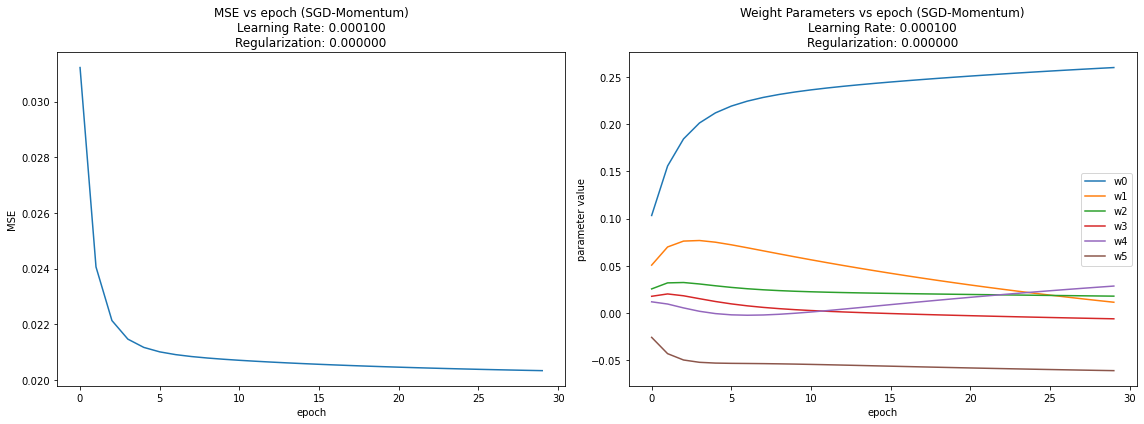

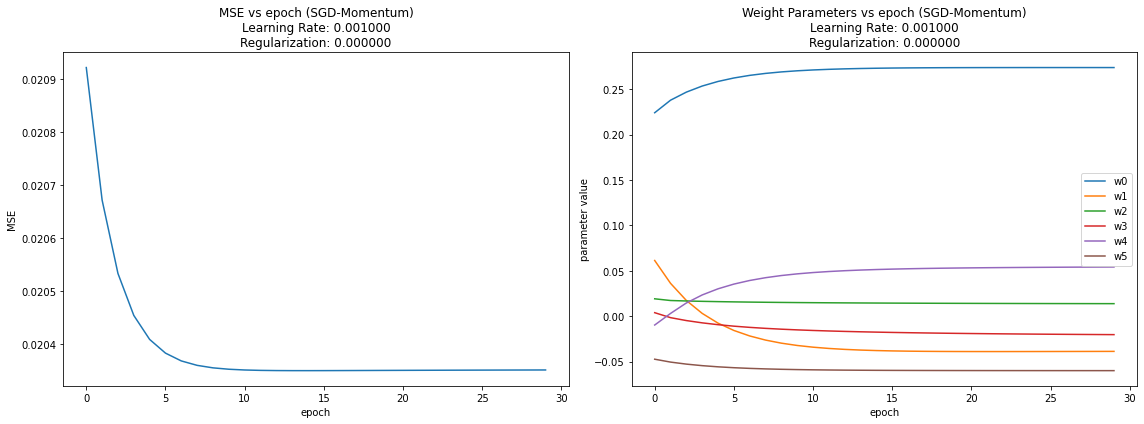

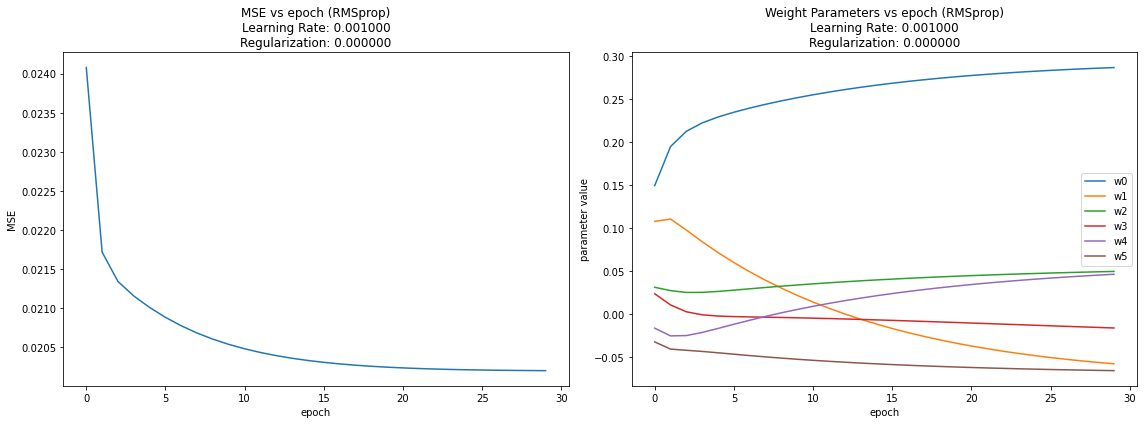

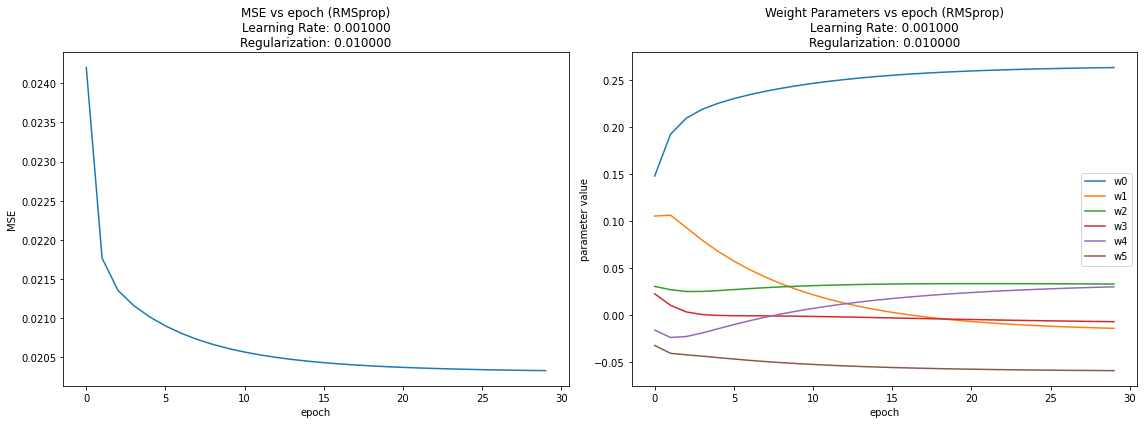

In [3]:
final_predictions = pd.DataFrame(columns = ['Model', 'Learning Rate', 'Regularization', 'MSE (after 1 Epoch)', 'MSE (after 10 Epochs)', 'MSE (after 20 Epochs)', 'MSE (after 30 Epochs)'])

learn_reg_list = []
for i in range(0, len(learning_rate)):
    for j in range(0, len(regularization)):
        learn_reg_list.append((learning_rate[i], regularization[j]))

lowest_mses = []

# Train the model for all combinations of Learning Rate and Regularization, for all epochs
for i in range(0, len(learn_reg_list)):
    model = LinearRegression(learn_reg_list[i][0], learn_reg_list[i][1], n_epochs)
    model.fit(X, y, update_rule = 'sgd_momentum', plot = False)
    lowest_mses.append(model.lowest_mse)
    final_predictions.loc[len(final_predictions)] = ['SGD-Momentum', learn_reg_list[i][0], learn_reg_list[i][1], model.first_mse, model.middle_mse_1, model.middle_mse_2, model.lowest_mse]

lowest_mse_indices = np.argsort(np.array(lowest_mses))[:2]

# Plot the best 2 combinations
print('\033[1mSGD-Momentum\n\nCombo 1\033[0m')
print('Learning Rate:', learn_reg_list[lowest_mse_indices[0]][0])
print('Regularization:', learn_reg_list[lowest_mse_indices[0]][1])
model = LinearRegression(learn_reg_list[lowest_mse_indices[0]][0], learn_reg_list[lowest_mse_indices[0]][1], n_epochs)
model.fit(X, y, update_rule = 'sgd_momentum', plot = True)
print('MSE:', model.lowest_mse)

print()
print('\033[1mCombo 2\033[0m')
print('Learning Rate:', learn_reg_list[lowest_mse_indices[1]][0])
print('Regularization:', learn_reg_list[lowest_mse_indices[1]][1])
model = LinearRegression(learn_reg_list[lowest_mse_indices[1]][0], learn_reg_list[lowest_mse_indices[1]][1], n_epochs)
model.fit(X, y, update_rule = 'sgd_momentum', plot = True)
print('MSE:', model.lowest_mse)

lowest_mses = []

# Train the model for all combinations of Learning Rate and Regularization, for all epochs
for i in range(0, len(learn_reg_list)):
    model = LinearRegression(learn_reg_list[i][0], learn_reg_list[i][1], n_epochs)
    model.fit(X, y, update_rule = 'RMSprop', plot = False)
    lowest_mses.append(model.lowest_mse)
    final_predictions.loc[len(final_predictions)] = ['RMSprop', learn_reg_list[i][0], learn_reg_list[i][1], model.first_mse, model.middle_mse_1, model.middle_mse_2, model.lowest_mse]

lowest_mse_indices = np.argsort(np.array(lowest_mses))[:2]

# Plot the best 2 combinations
print()
print('\033[1mRMSprop\n\nCombo 1\033[0m')
print('Learning Rate:', learn_reg_list[lowest_mse_indices[0]][0])
print('Regularization:', learn_reg_list[lowest_mse_indices[0]][1])
model = LinearRegression(learn_reg_list[lowest_mse_indices[0]][0], learn_reg_list[lowest_mse_indices[0]][1], n_epochs)
model.fit(X, y, update_rule = 'RMSprop', plot = True)
print('MSE:', model.lowest_mse)

print()
print('\033[1mCombo 2\033[0m')
print('Learning Rate:', learn_reg_list[lowest_mse_indices[1]][0])
print('Regularization:', learn_reg_list[lowest_mse_indices[1]][1])
model = LinearRegression(learn_reg_list[lowest_mse_indices[1]][0], learn_reg_list[lowest_mse_indices[1]][1], n_epochs)
model.fit(X, y, update_rule = 'RMSprop', plot = True)
print('MSE:', model.lowest_mse)

In [4]:
print('\033[1mFinal Predictions\033[0m')
final_predictions

Final Predictions


,Model,Learning Rate,Regularization,MSE (after 1 Epoch),MSE (after 10 Epochs),MSE (after 20 Epochs),MSE (after 30 Epochs)
0,SGD-Momentum,0.0001,0,3.122053e-02,2.074730e-02,2.048094e-02,2.033811e-02
1,SGD-Momentum,0.0001,0.01,3.130515e-02,2.078878e-02,2.054282e-02,2.041938e-02
2,SGD-Momentum,0.0001,0.1,3.206228e-02,2.168560e-02,2.158610e-02,2.156616e-02
3,SGD-Momentum,0.0010,0,2.092152e-02,2.035228e-02,2.035008e-02,2.035090e-02
4,SGD-Momentum,0.0010,0.01,2.100692e-02,2.050590e-02,2.049838e-02,2.049827e-02
5,SGD-Momentum,0.0010,0.1,2.228257e-02,2.217599e-02,2.217599e-02,2.217599e-02
6,SGD-Momentum,0.0100,0,5.075797e+06,4.511914e+61,5.115135e+122,5.799004e+183
7,SGD-Momentum,0.0100,0.01,8.008535e+06,8.382218e+62,1.474238e+125,2.592845e+187
8,SGD-Momentum,0.0100,0.1,2.590305e+06,2.123881e+68,1.317982e+137,8.178789e+205
9,SGD-Momentum,0.0500,0,6.643651e+120,NaN,NaN,NaN


### Result Observation and Performance Comparison

RMSProp and Momentum, though seemingly similar, take contrasting approaches. While momentum accelerates our search in direction of minima, RMSProp impedes our search in direction of oscillations. Few key observations from the above table: 
1. Across all iterations, least MSE is obtained from RMSProp (learning rate 0.001 and regularization 0). SGD-Momentum yields close enough MSE with learning rate of 0.0001. Hence, RMSProp is able to provide similar performance to SGD-Momentum, even with higher learning rates since it adjusts the learning rate implicitly.

2. For higher learning rates (in the order of 0.01-0.05), SGD-Momentum goes haywire and yields extremely high MSEs, possibly due to large oscillations. However, RMSProp due its very nature of avoiding oscillations and adjusting the learning rate, has a stable performance even with high learning rates. 

3. Regularization parameters don't yield better results in the case of SGD-Momentum, whereas a Regularization value of 0.01 yields the second best MSE for RMSProp.

4. The drop in MSE in the initial Epoch values is higher in the case of SGD-Momentum. This validates the understanding that momentum accelerates our search in direction of minima. 

Due to the RMSProp's stable performance over a large range of learning rates, we may want to prefer it over SGD-Momentum when the curvature of cost function is unknown. 

# Question 2: Tensorflow Playground (15 pts)

In this question, you will be playing with [Tensorflow Playground](https://playground.tensorflow.org).

Select "**Classification**" as the **Problem Type**. Among the four datasets shown in DATA, please select the **top right** dataset. 

Use the following settings as the DEFAULT settings for all **subquestions**: Learning rate = 0.03, Activation = Tanh, Regularization = None, Ratio of training to test data = 50%, Noise = 0, Batch Size = 30, input as $X_1$ with $X_2$, One hidden layer with two neurons.

a) **(4 pts)** Use the DEFAULT setting and run two experiments - one using **Tanh** as the activation function and one using the **Linear** activation function. Report the train, test losses for both at the end of **1000 epochs**. What qualitative difference do you observe in the decision boundaries obtained? What do you think is the reason for this? 

We will now study the effect of certain variations in the network structure or training process, keeping all other aspects the same as in the DEFAULT setting specified above, with **Tanh** as the activation.

b) **(4 pts)** Effect of number of hidden units: Keep other settings the same as in DEFAULT, report the training loss and test loss at the end of 1000 epochs **using 4 neurons and 8 neurons in the hidden layer**. What do you observe in terms of the decision boundary obtained as the number of neurons increases? What do you think is the reason for this? 

c) **(4 pts)** Effect of Learning rate and number of epochs: Keep other settings the same as in DEFAULT, change the Activation to **ReLU** and use **4 neurons** in the hidden layer. For learning rate 10, 1, 0.1, 0.01 and 0.001, report the train, test losses at the end of **100 epochs**, **1000 epochs** respectively. What do you observe from the change of loss vs learning rate, and the change of loss vs epoch numbers? 

d) **(3 pts)** Use the DEFAULT setting. Play around with any hyperparameters, network architectures or input features (such as $\sin(X_1), X_1^2$ etc.), and report the best train and test loss you obtain (test loss should be no greater than 0.06). Attach the screenshot showing your full network, output and the parameters. Briefly justify your results, and comment on what helps/what doesn't help with lowering the loss, etc. 

# Answer:

### Part (a)

#### Activation Function: Tanh

Train Loss: 0.195  
Test Loss: 0.191  

#### Activation Function: Linear

Train Loss: 0.499  
Test Loss: 0.501  

Linear activation function by its very nature, provides a linear boundary which is not suitable for such diagonally symmetric classification patterns. Hence, linear activation function cannot achieve more than 50% accuracy for such classification pattern which we can also observe from the train and test loss.

However, non linear nature of tanh activation function enables better decision boundary for such classification patterns yielding better accuracy for training and test data.

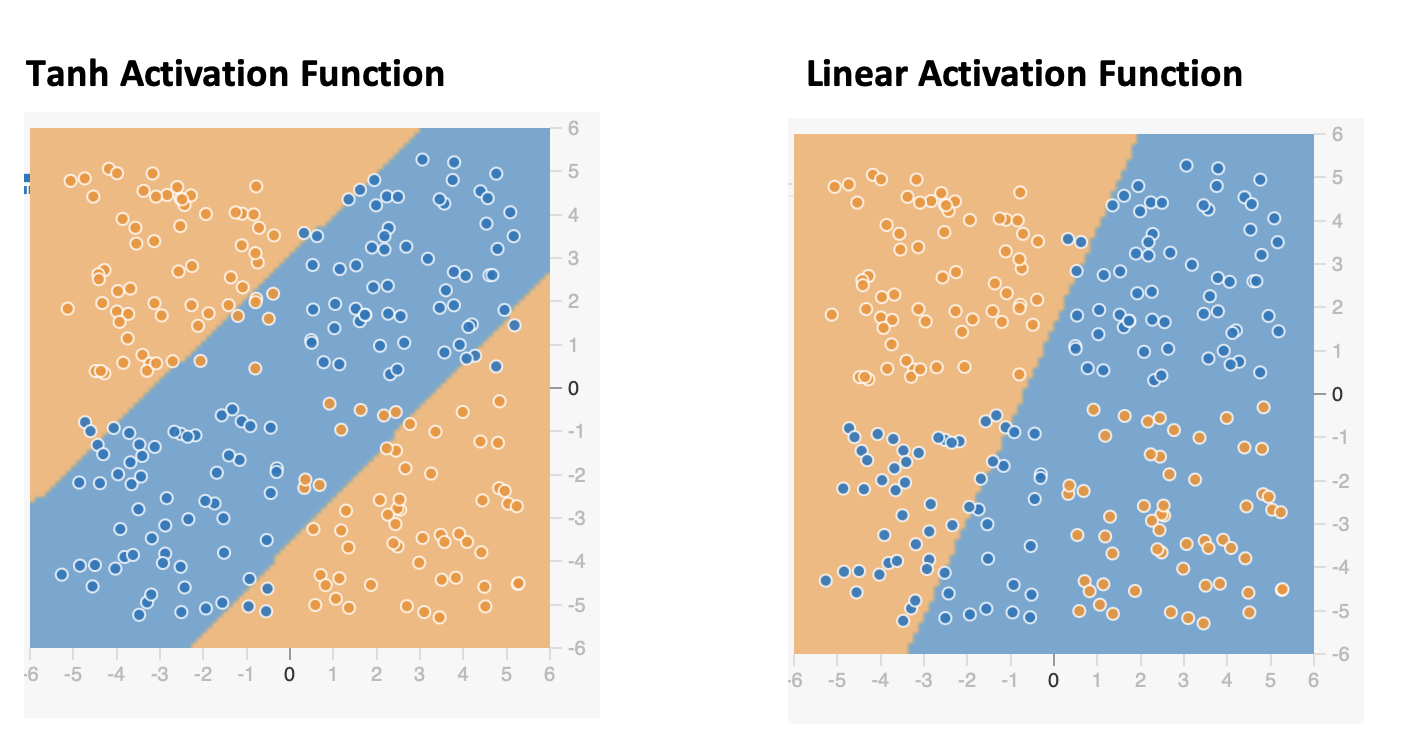

### Part (b)

#### Neurons in Hidden Layer: 4

Train Loss: 0.016  
Test Loss: 0.021  

#### Neurons in Hidden Layer: 8

Train Loss: 0.007  
Test Loss: 0.016  

We observe incremental improvement in accuracy using 8 neurons when compared to 4 neurons - decrease in test loss from 0.021 to 0.016. From the images present below, we observe similar decision boundary for both cases. Hence, with the increased complexity of 8 neurons, we are not able to add any "extra value" and it would be better to go ahead with simple neural network containing 4 neurons in the hidden layer. 

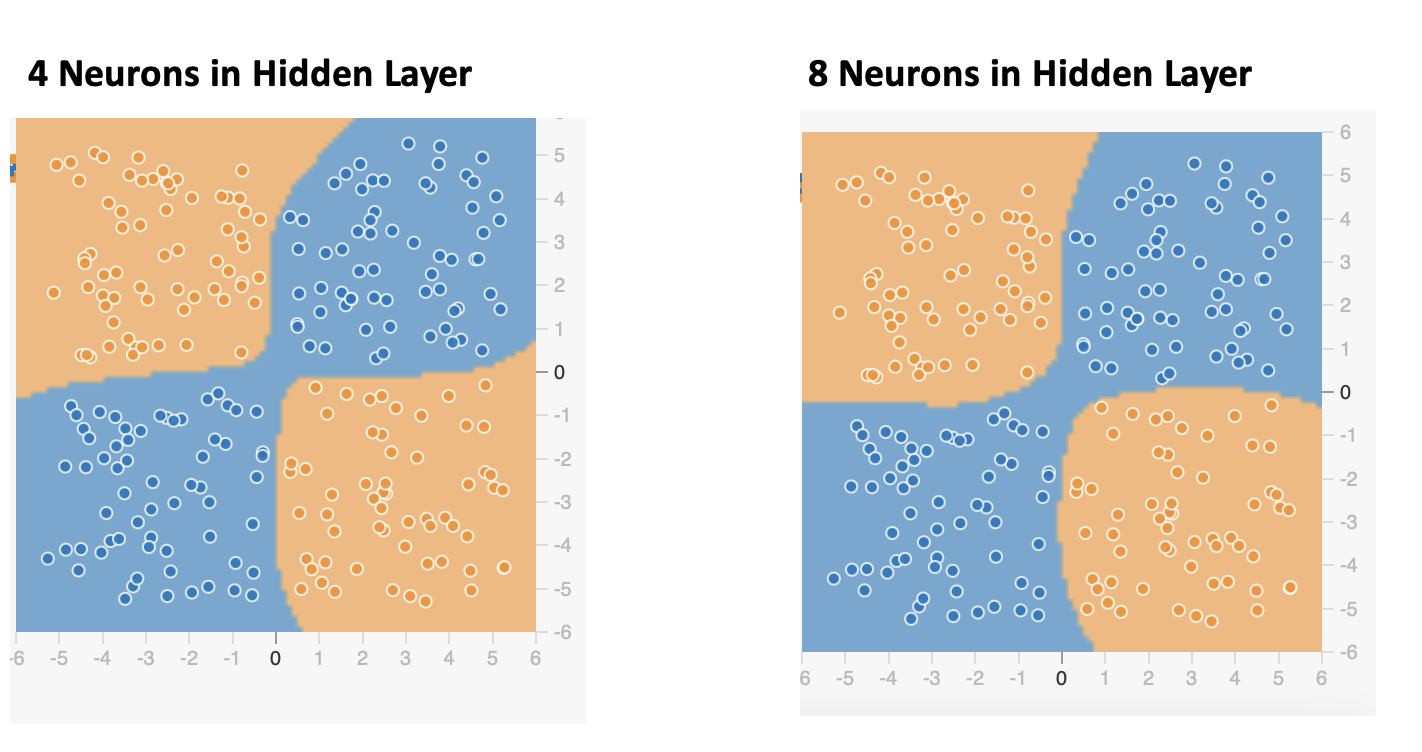

### Part (c)

| Learning Rate | Epochs | Train Loss | Test Loss |
|     ---       |  ---   |    ---     |    ---    |
| 10 | 100 | 0.984 | 0.944 |
| 10 | 1000 | 0.512 | 0.472 |
| 1 | 100 | 0.000 | 0.006 |
| 1 | 1000 | 0.000 | 0.003 |
| 0.1 | 100 | 0.010 | 0.016 |
| 0.1 | 1000 | 0.001 | 0.007 |
| 0.01 | 100 | 0.211 | 0.197 |
| 0.01 | 1000 | 0.188 | 0.169 |
| 0.001 | 100 | 0.354 | 0.339 |
| 0.001 | 1000 | 0.102 | 0.102 |

### Change of loss vs learning rate

We can see that large learning rate yields poor decision boundary. As we lower the learning rate, decision boundary starts improving till certain point, post which the boundary again starts deteriorating. Hence, we need to balance the trade off and find a sweet spot to obtain the best decision boundaries. 

### Change of loss vs epoch numbers

For optimal learning rates (1 - 0.1), higher epoch numbers seem to provide incremental improvement in training loss. However, for lower learning rates (0.01 - 0.001), higher epoch numbers provide much better decision boundaries since the Neural Net gets to perform large number of iterations to reduce the train/test loss. Ideally, we would prefer to have higher number of epochs and lower learning rate, however this might make the model too slow to search the error space and prone to overfitting.



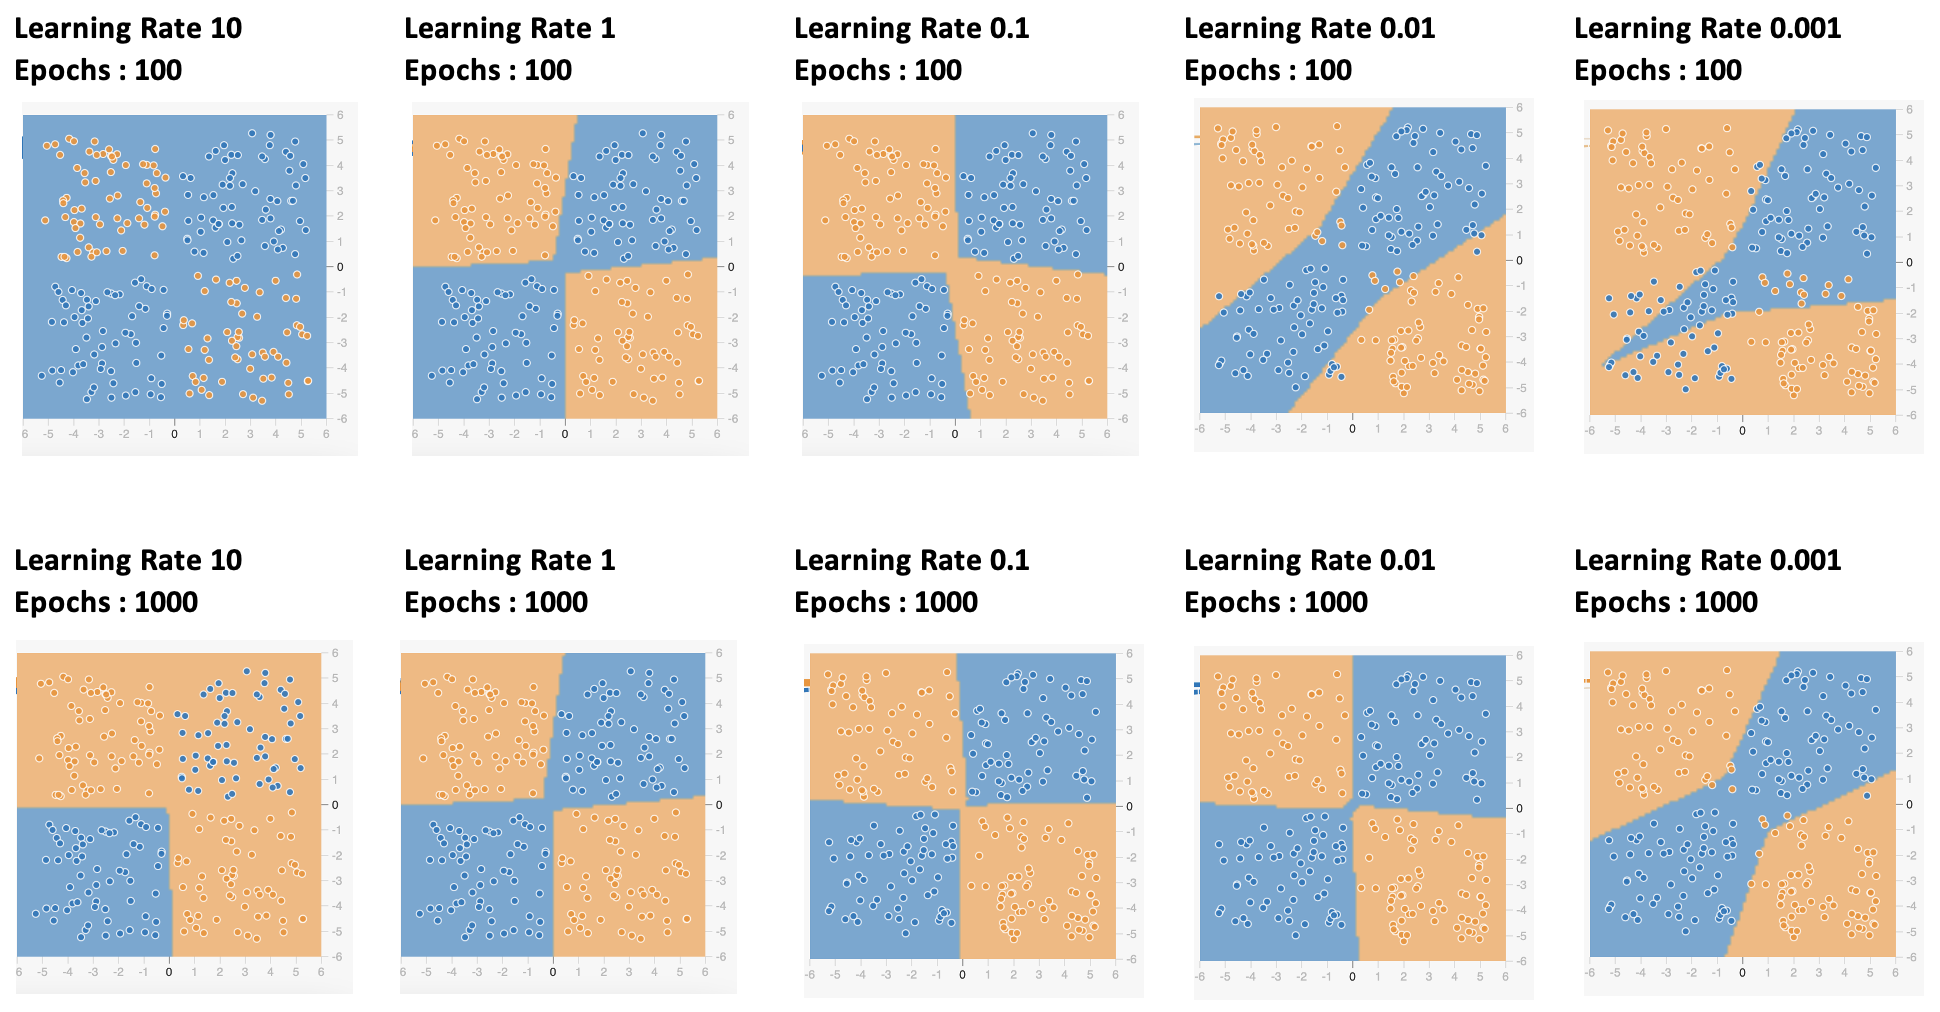

### Part (d)

We started off by the default settings. From previous sub-questions we  could see that tanh activation was yielding better decision boundaries and hence accuracy, hence we went ahead with that. We then tried couple of iterations varying the inputs, changing the number of hidden layers and hidden neurons per layer, and regularization. However, the simplest model yielding the best accuracy (0 loss on test data) is shown below. Hyperparameters for this model - 
1. Learning rate - 0.01 
2. Activation function - Tanh 
3. Regularization - None 
4. #epochs - 1,000
5. Inputs - $X_{1}$, $X_{2}$, $X_{1}X_{2}$
6. Number of hidden layers - 1 
7. #Neurons in the hidden layer - 4 

Our hypothesis is that, the key parameter responsible for high accuracy here is input $X_{1}X_{2}$ since the target classification pattern closely resembles this input transformation. This solutions is specific to this data problem due to the close pattern match.

Note: We tried $sin(X_{1})$ and $sin(X_{2})$ models as well; they were giving similarly great results. However, they were taking a higher number of epochs to reach the same train and test loss.

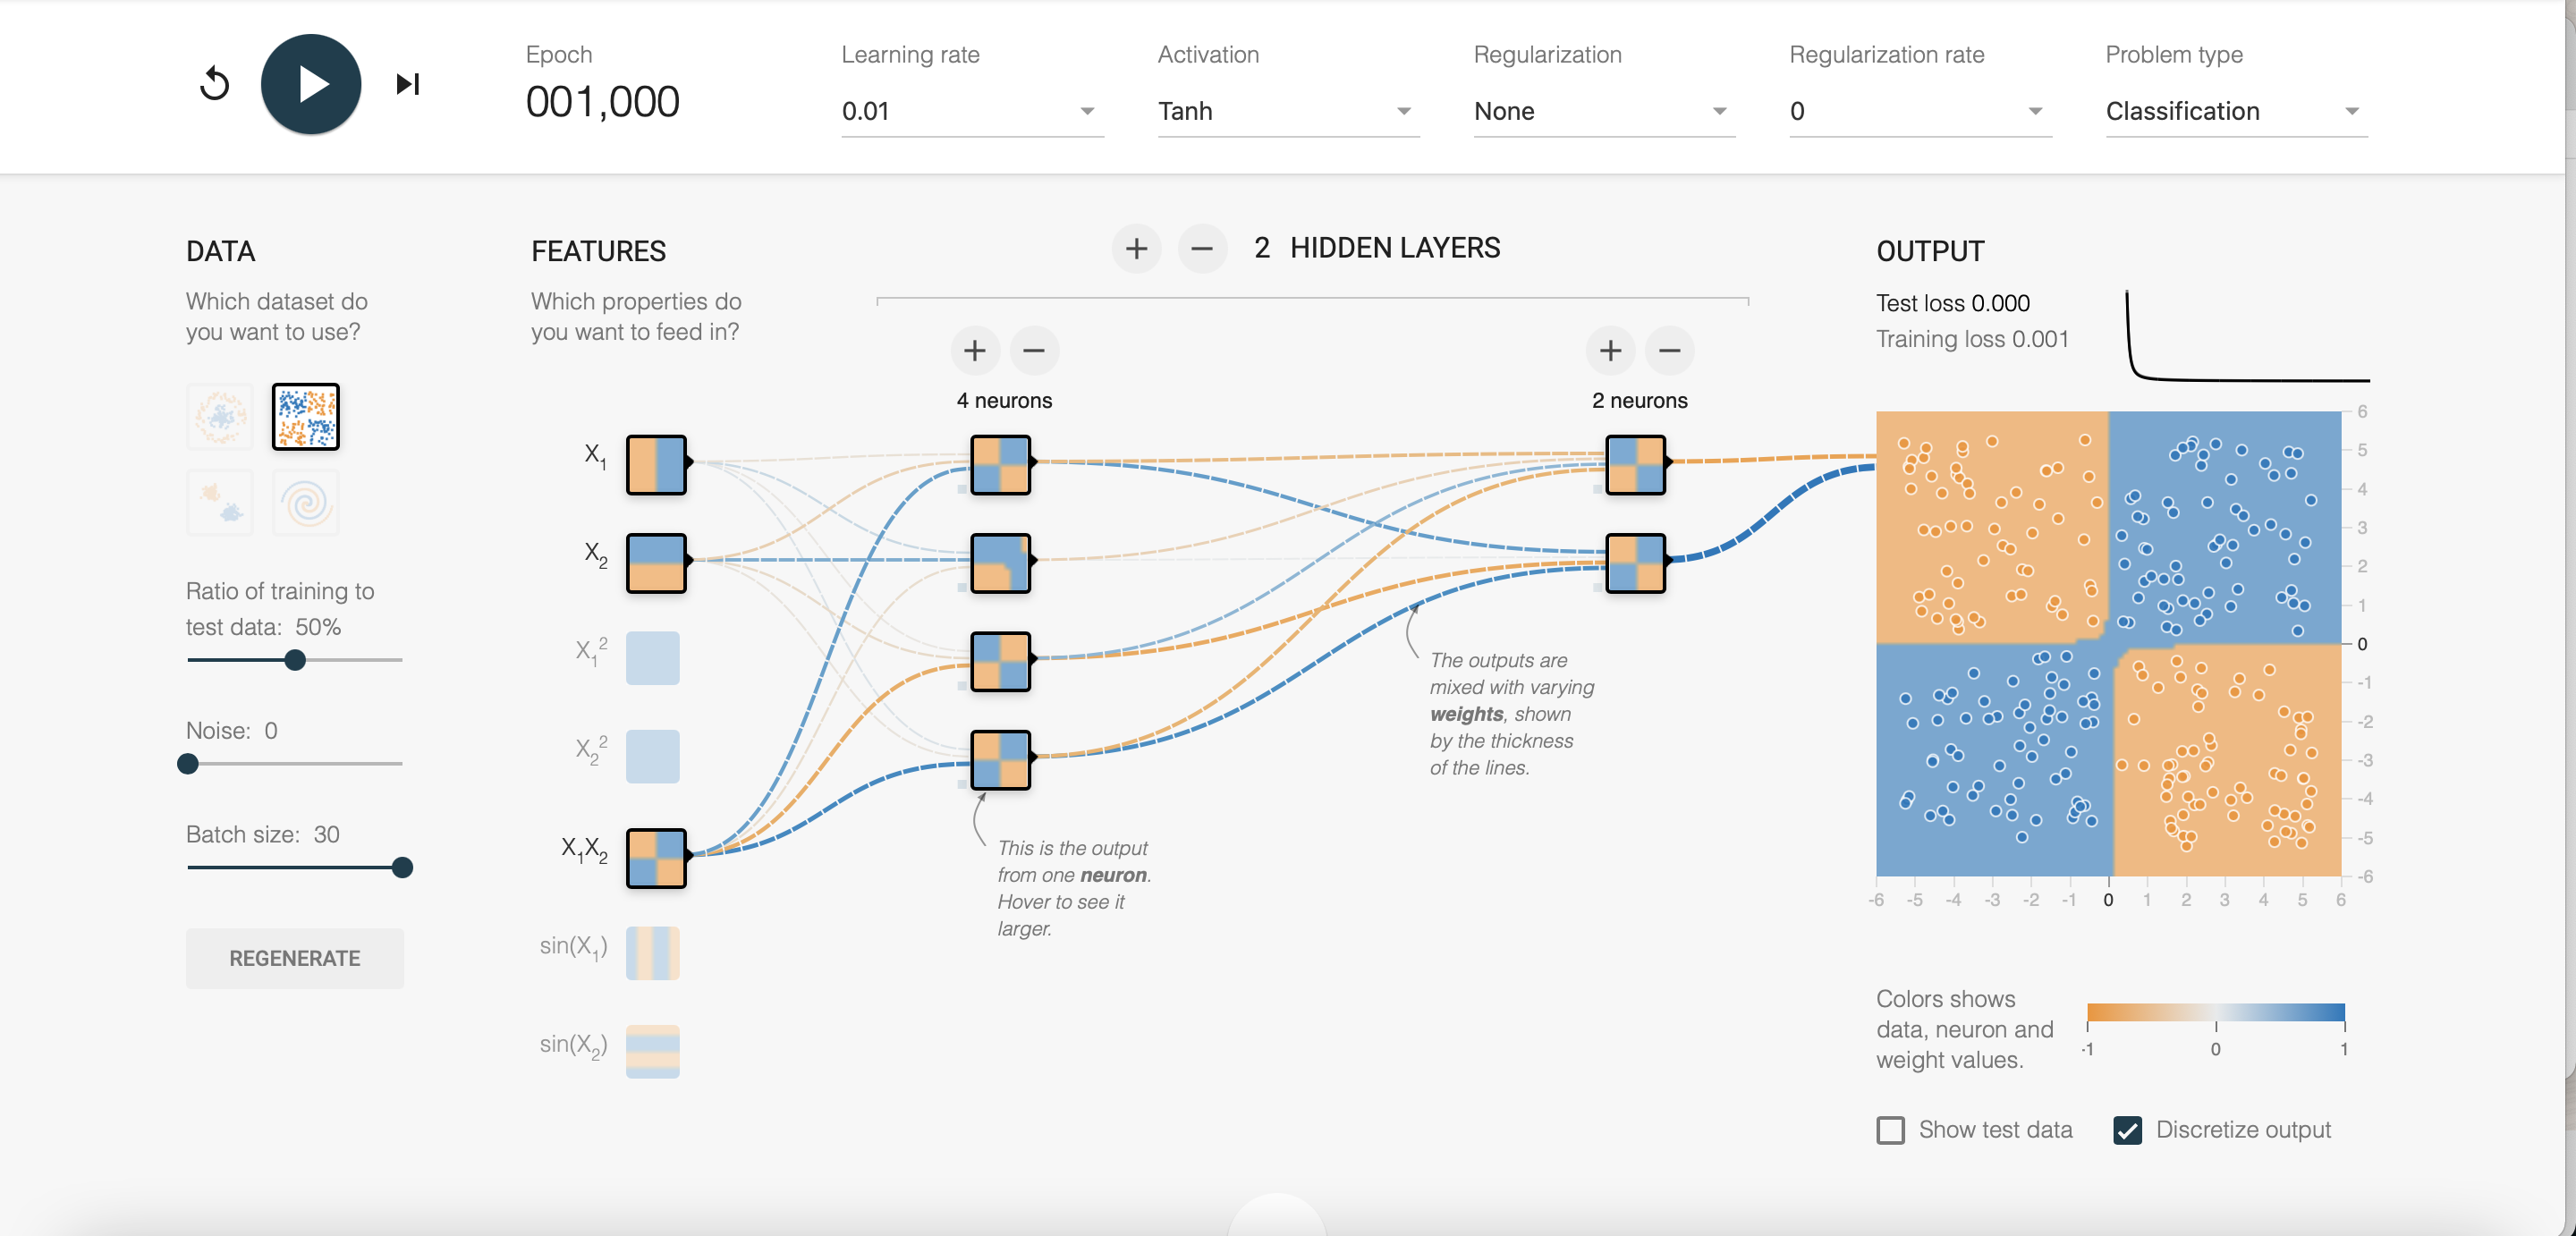

# Question 3: Outlier detection using PyOD (30 pts)

Oulier detection, or anomaly detection is usually an unsupervised learning task where the objective is to identify suspicious observations in data. It has been widely used in military surveillance for enemy activities to prevent attacks, intrusion detection in cyber security, fraud detection for credit cards, etc.

PyOD is a comprehensive and scalable Python library for detecting outlying objects in multivariate data. PyOD includes more than 30 detection algorithms and provides unified APIs which makes it quite handy to use. In this question, you will play with PyOD, explore three different outlier detection algorithms and compare their performances. First let's install PyOD.

```
# install pyod using pip first
!pip install pyod
```

You can load the data stored in 'Q3_train_dataset.csv' and 'Q3_test_dataset.csv' using the following codes.

```
import pandas as pd
# Load data code goes here
train_df = pd.read_csv('Q3_train_dataset.csv')
test_df = pd.read_csv('Q3_test_dataset.csv')

X_train = train_df[['X_train_0', 'X_train_1', 'X_train_2', 'X_train_3', 'X_train_4']].to_numpy()
y_train = train_df[['y_train']].to_numpy()
X_test = test_df[['X_test_0', 'X_test_1', 'X_test_2', 'X_test_3', 'X_test_4']].to_numpy()
y_test = test_df[['y_test']].to_numpy()
```

 `X_train` and `X_test` contain the features, with the dimension of 5. `y_train` and `y_test` store the outlier labels, 0 means normal data, 1 means outlier data. 
 
a) **(5 pts)** **Fit `X_train` to a linear outlier detection model Minimum Covariance Determinant (MCD) using PyOD**, this [page](https://pyod.readthedocs.io/en/latest/pyod.models.html#module-pyod.models.mcd) will provide some functions you may need. 

```
from pyod.models.mcd import MCD
clf = MCD() # initialize MCD class using the default parameters

# YOUR CODE SHOULD COME HERE, FIT THE MODEL USING X_TRAIN
```
**Use the fitted model to predict the outlier labels of `X_test`. Compute the raw outlier scores on `X_test` using `decision_function()`.**

**Run PyOD's `evaluate_print()` function using the test set ground truth outlier labels and the raw outlier scores predicted by the model, to compute the ROC and Precision@n results .** 

```
from pyod.utils.data import evaluate_print
```

b) **(5 pts)** `X_train` and `X_test` are 5-dimension features, which makes it impossible to visualize them in Euclidean plane. But we can use Principal Component Analysis (PCA) to reduce the dimensions of `X_train` and `X_test` to 2, and then plot them. You may want to use `fit_and_transform()` function.


```
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

# Fit pca to X_train and X_test and transform 
train_principalComponents = # IMPLEMENT
test_principalComponents = # IMPLEMENT
```

After reducing the dimension to 2, now you can visualize the outliers using PyOD's `visualize()` function. Please plot the visualization. You may find [this](https://pyod.readthedocs.io/en/latest/pyod.utils.html#module-pyod.utils.example) useful on how to use `visualize()` .

```
from pyod.utils.example import visualize
```

Now you should be able to observe the ground truth outliers and the outliers predicted by the model.


c) **(20 pts)** Apply the same process as in (a) and (b) to the following two models, and visualize the outlier results. Please compare the performance of the three models in terms of their ROC, Precision@n, and what you observe from the three visualizations.

*   [Proximity-Based model - Clustering Based Local Outlier Factor (CBLOF)](https://pyod.readthedocs.io/en/latest/pyod.models.html#module-pyod.models.cblof)
*   [Probabilistic model - Copula-based Outlier Detection (COPOD)](https://pyod.readthedocs.io/en/latest/pyod.models.html#module-pyod.models.copod)

```
from pyod.models.cblof import CBLOF
from pyod.models.copod import COPOD
```

# Answer:

In [5]:
# install pyod using pip first
# !pip install pyod

In [6]:
import pandas as pd
# Load data code goes here
train_df = pd.read_csv('Q3_train_dataset.csv')
test_df = pd.read_csv('Q3_test_dataset.csv')

X_train = train_df[['X_train_0', 'X_train_1', 'X_train_2', 'X_train_3', 'X_train_4']].to_numpy()
y_train = train_df[['y_train']].to_numpy()
X_test = test_df[['X_test_0', 'X_test_1', 'X_test_2', 'X_test_3', 'X_test_4']].to_numpy()
y_test = test_df[['y_test']].to_numpy()

### Part (a) - MCD Outlier Scores

In [7]:
# (a)
from pyod.models.mcd import MCD
clf = MCD() # initialize MCD class using the default parameters

# fit the model using X_train

clf.fit(X_train)

MCD(assume_centered=False, contamination=0.1, random_state=None,
  store_precision=True, support_fraction=None)

In [8]:
from pyod.utils.data import evaluate_print
# predict the outlier labels of X_test using the trained model, compute the raw outlier scores on X_test using decision_function()
# then use evaluate_print() to print out the evaluation results

y_test_decision_function = clf.decision_function(X_test)
print('\033[1m\033[4mMinimum Covariance Determinant (MCD)\033[0m\n')
print('\033[1mRaw Outlier Scores on X_test\033[0m')
print(y_test_decision_function)
print('\n\033[1mevaluate_print Results\033[0m')

# print(clf.labels_)
# print(clf.decision_scores_)

# extract the output of evaluate_print into variables
from io import StringIO
import sys
old_stdout = sys.stdout
sys.stdout = mystdout = StringIO()
evaluate_print(clf, y_test, y_test_decision_function)
sys.stdout = old_stdout
message = mystdout.getvalue()
print(message)

cf_roc = float(message[message.find('ROC:') + 4: message.find(', precision @ rank n:')])
print('ROC:', cf_roc)

cf_precision = float(message[message.find('precision @ rank n:') + 19:])
print('Precision@n:', cf_precision)

# Add ROC and Precision@n results to a DataFrame
df_results = pd.DataFrame(columns = ['Model Name', 'ROC', 'Precision@n'])
df_results.loc[len(df_results)] = ['Minimum Covariance Determinant (MCD)', cf_roc, cf_precision]

Minimum Covariance Determinant (MCD)

Raw Outlier Scores on X_test
[ 2.24049286  7.79420425  7.15471963  4.53945344  3.09612393 10.50510737
  4.91211156  4.57253544 10.42810171  3.44540757  9.46822585  4.16714098
  6.59229673  7.14745404  3.44635147  7.29027685  6.47059015  2.81636107
  5.16938393  9.65513568  8.57017657  3.80769823  4.5618471   7.8600722
  2.34549699  5.60197557  0.4998152   3.62347748  7.06436143  8.00932024
  4.92917585  2.50533141 11.35221813  3.37214055  3.31537212  6.40172493
  4.61028489 15.03520395  7.15295281  5.25662057  7.30615614  5.87806413
  4.66025036  6.48477863  3.01126762  4.06362926 12.72241975  2.72695773
  4.70993545  3.73184779  6.75842551  6.77787394  7.09521314  3.52584958
  2.970067    3.45782021 11.97279107  5.11301429  4.78849373  4.50221131
  4.93988958  3.86524661  4.57640519  9.6576524   4.07955181  8.18940538
  9.5632498   8.32743277  5.30484731  4.45409896  3.80368063  2.92651777
  5.33280404  5.22788346  7.36220873  5.17409055  8.791666

### Part (b) - PCA and MCF Outlier Visualization

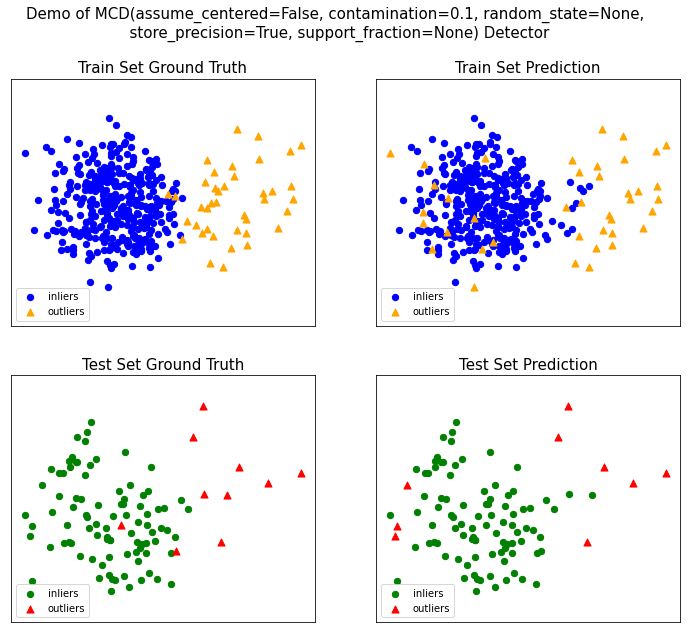

In [9]:
# (b)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

# Fit pca to X_train and X_test and transform 
train_principalComponents = pca.fit_transform(X_train)
test_principalComponents = pca.fit_transform(X_test)

# Predict y values using MCD
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

from pyod.utils.example import visualize
# Visualize the ground truth outliers and predicted outliers using visualize()

visualize(clf, train_principalComponents, y_train, test_principalComponents, y_test, 
          y_train_pred, y_test_pred, show_figure = True, save_figure = False)

### Part (c) - CBLOF and COPOD Outlier Scores and Visualization

In [10]:
# (c)
from pyod.models.cblof import CBLOF
from pyod.models.copod import COPOD

# CBLOF

clf_cblof = CBLOF() 
clf_cblof.fit(X_train)

y_test_decision_function_cblof = clf_cblof.decision_function(X_test)
print('\033[1m\033[4mClustering Based Local Outlier Factor (CBLOF)\033[0m\n')
print('\033[1mRaw Outlier Scores on X_test\033[0m')
print(y_test_decision_function_cblof)
print('\n\033[1mevaluate_print Results\033[0m')

# extract the output of evaluate_print into variables
from io import StringIO
import sys
old_stdout = sys.stdout
sys.stdout = mystdout = StringIO()
evaluate_print(clf_cblof, y_test, y_test_decision_function_cblof)
sys.stdout = old_stdout
message = mystdout.getvalue()

cf_cblof_roc = float(message[message.find('ROC:') + 4: message.find(', precision @ rank n:')])
print('ROC:', cf_cblof_roc)

cf_cblof_precision = float(message[message.find('precision @ rank n:') + 19:])
print('Precision@n:', cf_cblof_precision)

# Add ROC and Precision@n results to a DataFrame
df_results.loc[len(df_results)] = ['Clustering Based Local Outlier Factor (CBLOF)', cf_cblof_roc, cf_cblof_precision]

print()
# COPOD

clf_copod = COPOD() 
clf_copod.fit(X_train)

y_test_decision_function_copod = clf_copod.decision_function(X_test)
print('\033[1m\033[4mCopula Based Outlier Detector (COPOD)\033[0m\n')
print('\033[1mRaw Outlier Scores on X_test\033[0m')
print(y_test_decision_function_copod)
print('\n\033[1mevaluate_print Results\033[0m')

# extract the output of evaluate_print into variables
from io import StringIO
import sys
old_stdout = sys.stdout
sys.stdout = mystdout = StringIO()
evaluate_print(clf_copod, y_test, y_test_decision_function_copod)
sys.stdout = old_stdout
message = mystdout.getvalue()

cf_copod_roc = float(message[message.find('ROC:') + 4: message.find(', precision @ rank n:')])
print('ROC:', cf_copod_roc)

cf_copod_precision = float(message[message.find('precision @ rank n:') + 19:])
print('Precision@n:', cf_copod_precision)

# Add ROC and Precision@n results to a DataFrame
df_results.loc[len(df_results)] = ['Copula Based Outlier Detector (COPOD)', cf_copod_roc, cf_copod_precision]

Clustering Based Local Outlier Factor (CBLOF)

Raw Outlier Scores on X_test
[0.55766311 1.92772259 2.17957244 1.50936955 1.10888929 1.7560601
 1.50105375 1.56983472 2.12424239 1.44979446 2.17303805 1.00975888
 1.24947761 1.89119459 1.34908401 1.82970973 1.84363691 0.50785131
 1.38945887 2.32636567 1.9558309  1.00159645 1.20982524 1.29141877
 1.16831247 1.33583169 1.18420999 1.46599842 1.66931278 2.26233909
 1.64865595 1.26365091 2.70952184 1.5534688  0.75881586 2.02102887
 1.71796136 2.91625253 1.61867442 1.71279024 1.62257037 1.39615075
 0.66172508 1.52707647 1.14767595 1.3898882  2.06697589 1.57569712
 1.7558295  0.65185048 1.95819696 1.78294798 1.43689121 1.41247169
 0.62278535 0.66603527 1.82205095 1.29994733 1.38684374 1.2960101
 1.07324882 1.56913947 1.40090671 2.24400096 1.41606853 1.32633656
 2.35479064 1.68301727 1.36237108 1.8012095  1.72219011 1.34004978
 1.15776672 1.6939029  1.64801474 1.69475922 1.71382865 2.27278211
 2.34319821 1.35466349 1.00731802 0.86734577 1.47959482

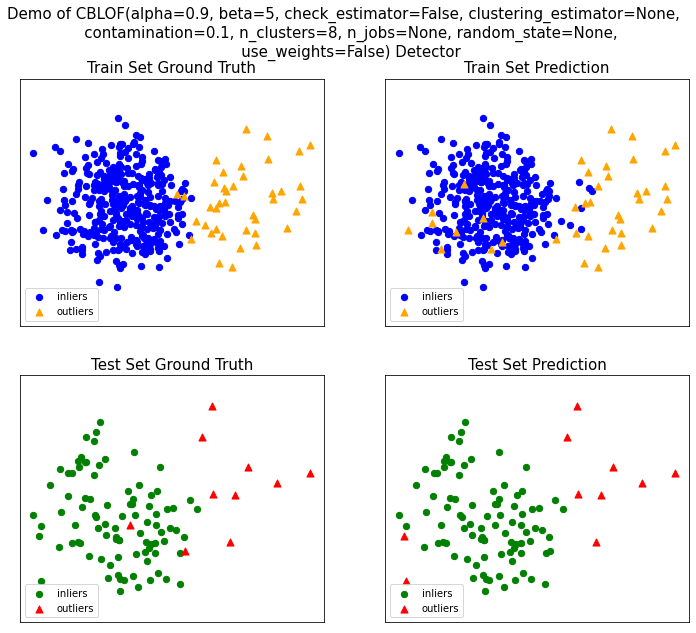

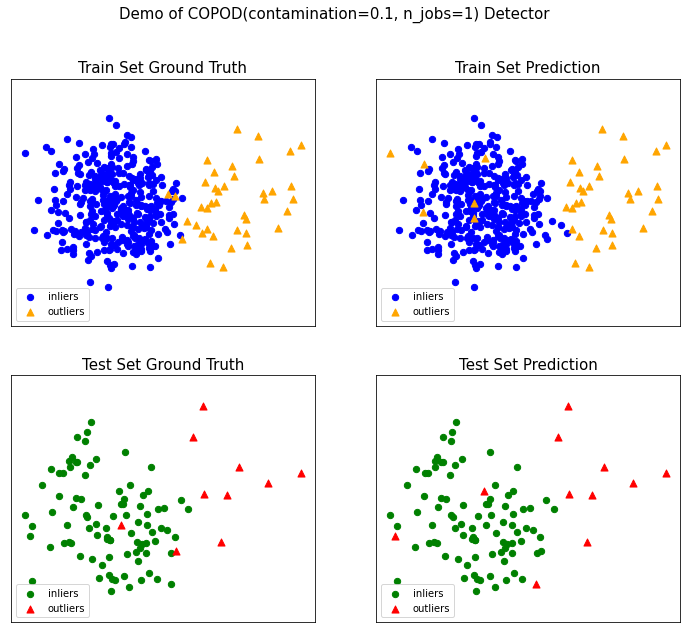

In [11]:
# Predict y values using CBLOF
y_train_pred_cblof = clf_cblof.predict(X_train)
y_test_pred_cblof = clf_cblof.predict(X_test)

# Predict y values using COPOD
y_train_pred_copod = clf_copod.predict(X_train)
y_test_pred_copod = clf_copod.predict(X_test)

# Visualize CBLOF
visualize(clf_cblof, train_principalComponents, y_train, test_principalComponents, y_test, 
          y_train_pred_cblof, y_test_pred_cblof, show_figure = True, save_figure = False)

# Visualize COPOD
visualize(clf_copod, train_principalComponents, y_train, test_principalComponents, y_test, 
          y_train_pred_copod, y_test_pred_copod, show_figure = True, save_figure = False)

### Part (c) - Model Comparison

In [12]:
# Comparison Table
df_results

,Model Name,ROC,Precision@n
0,Minimum Covariance Determinant (MCD),0.8689,0.6
1,Clustering Based Local Outlier Factor (CBLOF),0.8844,0.8
2,Copula Based Outlier Detector (COPOD),0.9556,0.8


As can be seen from the above table, the COPOD model performs best in terms of ROC and Precision, followed by CBLOF and then MCD. COPOD also has the best Precision.

This can also be seen from the visualized plots where COPOD predictions for the test set match the ground truth the most. 

*Note: CBLOF values keep changing when a Random State is not set.*

# Question 4: PCA Conceptual questions (5 pts)
Explain the principle of Principal Component Analysis algorithm, especially why we can select the best projection bases based on the covariance matrix of data from the perspective of optimization?

# Answer:

#### What is PCA? 

Principal Component Analysis (PCA) is a method deployed to reduce dimension of large data sets, by transforming a large set of variables into a smaller set that still contains most of the information in the large set, i.e. it retains the maximum variance.

However, generally there is a trade-off between reducing the dimension and losing out on accuracy. Hence, the trick in dimensionality reduction is to trade a little accuracy for simplicity.

#### How is PCA performed?
PCA is performed by identifying the Principal components from large data set, subset of which act as the new variables for the data. Principal components represent the direction of the data that explain a maximal amount of variance, i.e. the lines that capture most information of the data. The larger the variance across a direction, the larger the dispersion of the data points along it, and hence more information the particular direction has. 

#### What role does covariance matrix play?
Covariance matrix is leveraged to calculate PCA components. This matrix has covariances between all possible combinations of initial variables which basically helps us understand relationship between different variables and identify redundant variables.

Eigenvectors of the Covariance matrix are actually the directions of the axes containing the most variation (information) and such eigenvectors are called principal components. And eigenvalues are the coefficients attached to eigenvectors, which give the amount of variance carried in each Principal Component. First component explains the highest variation followed by other orthogonal components. Hence, we select first few Principal components explaining sufficient amount of variation in the data. When reconstructing the features at the end, PCA thus minimizes the reconstruction error. This makes PCA the most optimized algorithm. 



# Question 5: Pre-processing and sampling (15 pts)

The following dataset contains House prices describing the sales of individual residential property in Ames, Iowa data with explanatory variables describing almost every aspect of residential homes and dependent variable being SalePrice. Here, some cells of most columns in the dataset contain NaN values.













In [13]:
import pandas as pd 
import numpy as np 
import scipy.stats as stats
import math
import matplotlib.pyplot as plt
np.random.seed(100)

data = pd.read_csv("sales_data.csv")
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SalePrice
0,60,RL,65.0,8450,NaN,7,5,2003,2003,196.0,...,0,0,0,NaN,NaN,NaN,0,2,2008,208500
1,20,RL,80.0,9600,NaN,6,8,1976,1976,0.0,...,0,0,0,NaN,NaN,NaN,0,5,2007,181500
2,60,RL,68.0,11250,NaN,7,5,2001,2002,162.0,...,0,0,0,NaN,NaN,NaN,0,9,2008,223500
3,70,RL,60.0,9550,NaN,7,5,1915,1970,0.0,...,0,0,0,NaN,NaN,NaN,0,2,2006,140000
4,60,RL,84.0,14260,NaN,8,5,2000,2000,350.0,...,0,0,0,NaN,NaN,NaN,0,12,2008,250000


# Answer


a) **(2 pts)** Print the number of NaN values in each column.


In [14]:
print('Number of NaN values in each column:')
data_nan = pd.DataFrame()

data_nan['Column Name'] = data.isna().sum().index
data_nan['NaN Count'] = data.isna().sum().tolist()

data_nan

Number of NaN values in each column:


,Column Name,NaN Count
0,MSSubClass,0
1,MSZoning,0
2,LotFrontage,259
3,LotArea,0
4,Alley,1369
5,OverallQual,0
6,OverallCond,0
7,YearBuilt,0
8,YearRemodAdd,0
9,MasVnrArea,8


b) **(3 pts)** Create a copy of `data`, and name it `data_dm`, then create a new column in `data_dm` named `binned_yr_built` and apply binning to the column `yr_built`. Use `pandas.cut()` and modify its paramter list as below:

```
bins=[1900, 1920, 1940, 1960, 1980, 2000, 2020]
labels=['1900-1920', '1920-1940', '1940-1960', '1960-1980', '1980-2000', '2000-2020']
include_lowest=True
```
Next, perform one-hot encoding on this new column.

In [15]:
# Data Binning
data_dm = data.copy()
data_dm['binned_yr_built'] = pd.cut(data_dm['YearBuilt'], 
                                    bins = [1900, 1920, 1940, 1960, 1980, 2000, 2020], 
                                    labels = ['1900-1920', '1920-1940', '1940-1960', '1960-1980', '1980-2000', '2000-2020'],
                                    include_lowest = True)
data_dm.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SalePrice,binned_yr_built
0,60,RL,65.0,8450,NaN,7,5,2003,2003,196.0,...,0,0,NaN,NaN,NaN,0,2,2008,208500,2000-2020
1,20,RL,80.0,9600,NaN,6,8,1976,1976,0.0,...,0,0,NaN,NaN,NaN,0,5,2007,181500,1960-1980
2,60,RL,68.0,11250,NaN,7,5,2001,2002,162.0,...,0,0,NaN,NaN,NaN,0,9,2008,223500,2000-2020
3,70,RL,60.0,9550,NaN,7,5,1915,1970,0.0,...,0,0,NaN,NaN,NaN,0,2,2006,140000,1900-1920
4,60,RL,84.0,14260,NaN,8,5,2000,2000,350.0,...,0,0,NaN,NaN,NaN,0,12,2008,250000,1980-2000


In [16]:
# One-hot Encoding
df_one_hot_encoded = pd.get_dummies(data_dm['binned_yr_built'], prefix='binned_yr_built')
data_dm = data_dm.join(df_one_hot_encoded)

print('One-hot Encoding Result')
df_one_hot_encoded

One-hot Encoding Result


,binned_yr_built_1900-1920,binned_yr_built_1920-1940,binned_yr_built_1940-1960,binned_yr_built_1960-1980,binned_yr_built_1980-2000,binned_yr_built_2000-2020
0,0,0,0,0,0,1
1,0,0,0,1,0,0
2,0,0,0,0,0,1
3,1,0,0,0,0,0
4,0,0,0,0,1,0
...,...,...,...,...,...,...
1455,0,0,0,0,1,0
1456,0,0,0,1,0,0
1457,0,0,1,0,0,0
1458,0,0,1,0,0,0



c) **(2 pts)** Drop the columns which have more than 65 percentage of missing values.

In [17]:
drop_columns = []
total_rows = len(data)

for i in range(len(data_nan)):
    if data_nan['NaN Count'].iloc[i] / total_rows > 0.65:
        drop_columns.append(data_nan['Column Name'].iloc[i])

print('Original Dimensions of DataFrame:', data.shape)
data = data.drop(columns = drop_columns)
print('New Dimensions of DataFrame:', data.shape)

data.head()

Original Dimensions of DataFrame: (1460, 50)
New Dimensions of DataFrame: (1460, 46)


,MSSubClass,MSZoning,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,RL,65.0,8450,7,5,2003,2003,196.0,Gd,...,0,61,0,0,0,0,0,2,2008,208500
1,20,RL,80.0,9600,6,8,1976,1976,0.0,TA,...,298,0,0,0,0,0,0,5,2007,181500
2,60,RL,68.0,11250,7,5,2001,2002,162.0,Gd,...,0,42,0,0,0,0,0,9,2008,223500
3,70,RL,60.0,9550,7,5,1915,1970,0.0,TA,...,0,35,272,0,0,0,0,2,2006,140000
4,60,RL,84.0,14260,8,5,2000,2000,350.0,Gd,...,192,84,0,0,0,0,0,12,2008,250000



d) **(3 pts)** Take a sample of 800 rows at random and compute its mean, compare this value with the population mean.
  

In [18]:
np.random.seed(6)
sample_ages = np.random.choice(a= data['SalePrice'], size=800)

#Sample mean
sample_mean = sample_ages.mean()
print('Sample Mean:', sample_mean)

#Population mean
population_mean = data['SalePrice'].mean()
print('Population Mean:', population_mean)

print()
if sample_mean < population_mean:
    print('Sample Mean is lesser than the Population Mean.')
elif sample_mean > population_mean:
    print('Sample Mean is greater than the Population Mean.')
else:
    print('Sample Mean is equal to the Population Mean.')

Sample Mean: 178292.63125
Population Mean: 180921.19589041095

Sample Mean is lesser than the Population Mean.


e) **(2pts)** Calculate the 95% confidence intervals for SalePrice with a sample size of 100. 

**(3pts)** Calculate the 95% confidence intervals for 100 different trials with a sample size of 500. Plot the confidence intervals and interpret how it captures the population mean.

In [19]:
import scipy

np.random.seed(10)
sample_size = 100
sample = np.random.choice(a= data_dm['SalePrice'],
                          size = sample_size)
sample_mean = sample.mean()

#Get the critical Z value
z_critical = scipy.stats.norm.ppf(1-0.05/2) # critical Z value for 95% confidence interval

#Get population standard deviation
pop_stdev = data_dm['SalePrice'].std()

#margin of error
margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size)) 

#confidence interval
confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

true_mean = data_dm['SalePrice'].mean()

#Print confidence interval and true mean value
print('Confidence Interval:', confidence_interval)
print('True Mean:', true_mean)


Confidence Interval: (166522.08555078227, 197662.97444921773)
True Mean: 180921.19589041095


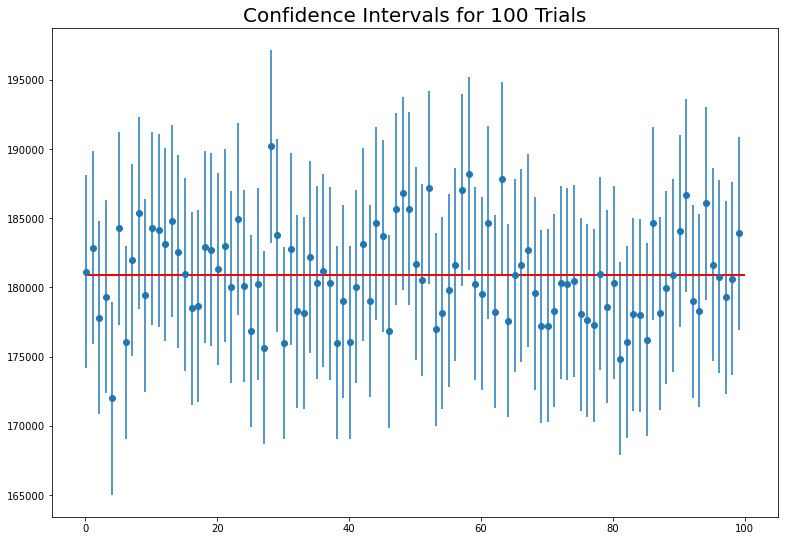

In [20]:
np.random.seed(12)

sample_size = 500

intervals = []
sample_means = []

for sample in range(100):
    sample = np.random.choice(a= data_dm['SalePrice'], size = sample_size)
    sample_mean = sample.mean()
    sample_means.append(sample_mean)
    # compute z critical value
    z_critical = scipy.stats.norm.ppf(1-0.05/2) # critical Z value for 95% confidence interval

    # compute population standard deviation  
    pop_stdev = data_dm['SalePrice'].std()
  
    margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))
    confidence_interval = (sample_mean - margin_of_error,
                           sample_mean + margin_of_error)  
    
    intervals.append(confidence_interval)
    
plt.figure(figsize=(13, 9))

plt.errorbar(x=np.arange(0.1, 100, 1), 
             y=sample_means, 
             yerr=[(top-bot)/2 for top,bot in intervals],
             fmt='o')

plt.hlines(xmin=0, xmax=100,
           y=data['SalePrice'].mean(), 
           linewidth=2.0,
           color="red")
plt.title('Confidence Intervals for 100 Trials', fontsize = 20)
plt.show()

The confidence interval for the sample keeps shifting in each trial. However, since constant random sampling is mean reverting, we can see that the overall mean confidence interval throughout the 100 trials roughly equals the confidence interval for the population mean. This can be intuitively visualized by the fact the number of confidence intervals with a sample mean above the population mean roughly equals that below the population mean. 